# Missing Data

In [14]:
import pandas as pd 
import numpy as np 

# Creating a sample DataFrame with missing values 
data = { 
    'School ID': [101, 102, 103, np.nan, 105, 106, 107, 108], 
    'Name': ['Alice', 'Bob', 'Charlie', 'David', 'Eva', 'Frank', 'Grace', 'Henry'], 
    'Address': ['123 Main St', '456 Oak Ave', '789 Pine Ln', '101 Elm St', np.nan, '222 Maple Rd', '444 Cedar Blvd', '555 Birch Dr'], 
    'City': ['Los Angeles', 'New York', 'Houston', 'Los Angeles', 'Miami', np.nan, 'Houston', 'New York'], 
    'Subject': ['Math', 'English', 'Science', 'Math', 'History', 'Math', 'Science', 'English'], 
    'Marks': [85, 92, 78, 89, np.nan, 95, 80, 88], 
    'Rank': [2, 1, 4, 3, 8, 1, 5, 3], 
    'Grade': ['B', 'A', 'C', 'B', 'D', 'A', 'C', 'B'] 
} 

df = pd.DataFrame(data) 
print("Sample DataFrame:") 
df

Sample DataFrame:


,School ID,Name,Address,City,Subject,Marks,Rank,Grade
0,101.0,Alice,123 Main St,Los Angeles,Math,85.0,2,B
1,102.0,Bob,456 Oak Ave,New York,English,92.0,1,A
2,103.0,Charlie,789 Pine Ln,Houston,Science,78.0,4,C
3,NaN,David,101 Elm St,Los Angeles,Math,89.0,3,B
4,105.0,Eva,NaN,Miami,History,NaN,8,D
5,106.0,Frank,222 Maple Rd,NaN,Math,95.0,1,A
6,107.0,Grace,444 Cedar Blvd,Houston,Science,80.0,5,C
7,108.0,Henry,555 Birch Dr,New York,English,88.0,3,B


ตรวจสอบเบื้องต้นดังนี้

In [12]:
df.isnull()

,School ID,Name,Address,City,Subject,Marks,Rank,Grade
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,True,False,False,False,False,False,False,False
4,False,False,True,False,False,True,False,False
5,False,False,False,True,False,False,False,False
6,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False


In [10]:
df.isnull().sum()

School ID    1
Name         0
Address      1
City         1
Subject      0
Marks        1
Rank         0
Grade        0
dtype: int64

In [11]:
df.isna().sum()

School ID    1
Name         0
Address      1
City         1
Subject      0
Marks        1
Rank         0
Grade        0
dtype: int64

# การจัดการกับ missing data มีทั้งหมดสามวิธี

# Three Approaches


### 1) A Simple Option: Drop Columns or Row with Missing Values

The simplest option is to drop columns with missing values. 

![tut2_approach1](https://storage.googleapis.com/kaggle-media/learn/images/Sax80za.png)

Unless most values in the dropped columns are missing, the model loses access to a lot of (potentially useful!) information with this approach.  As an extreme example, consider a dataset with 10,000 rows, where one important column is missing a single entry. This approach would drop the column entirely!

ใช้คำสั่ง `df.dropna()` สำหรับตัด row หรือ column ที่ Nan ออก

In [5]:
df_clean_1 = df.dropna()

In [7]:
df

,School ID,Name,Address,City,Subject,Marks,Rank,Grade
0,101.0,Alice,123 Main St,Los Angeles,Math,85.0,2,B
1,102.0,Bob,456 Oak Ave,New York,English,92.0,1,A
2,103.0,Charlie,789 Pine Ln,Houston,Science,78.0,4,C
3,NaN,David,101 Elm St,Los Angeles,Math,89.0,3,B
4,105.0,Eva,NaN,Miami,History,NaN,8,D
5,106.0,Frank,222 Maple Rd,NaN,Math,95.0,1,A
6,107.0,Grace,444 Cedar Blvd,Houston,Science,80.0,5,C
7,108.0,Henry,555 Birch Dr,New York,English,88.0,3,B


In [6]:
df_clean_1

,School ID,Name,Address,City,Subject,Marks,Rank,Grade
0,101.0,Alice,123 Main St,Los Angeles,Math,85.0,2,B
1,102.0,Bob,456 Oak Ave,New York,English,92.0,1,A
2,103.0,Charlie,789 Pine Ln,Houston,Science,78.0,4,C
6,107.0,Grace,444 Cedar Blvd,Houston,Science,80.0,5,C
7,108.0,Henry,555 Birch Dr,New York,English,88.0,3,B


### 2) A Better Option: Imputation

**Imputation** fills in the missing values with some number.  For instance, we can fill in the mean value along each column. 

![tut2_approach2](https://storage.googleapis.com/kaggle-media/learn/images/4BpnlPA.png)

The imputed value won't be exactly right in most cases, but it usually leads to more accurate models than you would get from dropping the column entirely.


### แบ่งออกเป็นหลายวิธีย่อย
**1. Mean Medium Mode**

Mean, Median, and Mode Imputation:
Replace missing values with the mean, median, or mode of the relevant variable.

Simple and efficient: Easy to implement.

Can be inaccurate: Doesn’t consider the relationships between variables.

เป็นการเติมค่าที่เป็น Nan ด้วยค่ากลาง(Central trendency) ทางสถิติ

ใช้คำสั่ง `df['ชื่อcol'].fillna(df['ชื่อcol'].mean())` สำหรับเติมค่ากลางในช่อง nan

In [17]:
# Mean, Median, and Mode Imputation 
mean_imputation = df['Marks'].fillna(df['Marks'].mean()) 
print("\nImputation using Mean:") 
mean_imputation


Imputation using Mean:


0    85.000000
1    92.000000
2    78.000000
3    89.000000
4    86.714286
5    95.000000
6    80.000000
7    88.000000
Name: Marks, dtype: float64

In [18]:
median_imputation = df['Marks'].fillna(df['Marks'].median()) 
print("\nImputation using Med:") 
median_imputation


Imputation using Med:


0    85.0
1    92.0
2    78.0
3    89.0
4    88.0
5    95.0
6    80.0
7    88.0
Name: Marks, dtype: float64

In [25]:
mode_imputation = df['Marks'].fillna(df['Marks'].mode().iloc[0]) #ในกรณีที่ค่า Mode มีมากกว่า 1 ค่่าต้องระบุด้วยว่าเอาตัวไหน
print("\nImputation using Mode:") 
mode_imputation


Imputation using Mode:


0    85.0
1    92.0
2    78.0
3    89.0
4    78.0
5    95.0
6    80.0
7    88.0
Name: Marks, dtype: float64

**2. Forward and Backward Fill**

**2.1 Backward Fill (backward_fill)** 

`df['Marks'].fillna(method='bfill')` or `df['Marks'].bfill()`: This method fills missing values in the ‘Marks’ column using a backward fill strategy. 

It replaces missing values with the next observed non-missing value in the column.

backward_fill: The result is stored in the variable backward_fill.

**2.2 Forward Fill (forward_fill)**

`df['Marks'].fillna(method='ffill')` or `df['Marks'].ffill()`: This method fills missing values in the ‘Marks’ column of the DataFrame (df) using a forward fill strategy. 

It replaces missing values with the last observed non-missing value in the column.

forward_fill: The result is stored in the variable forward_fill.


In [33]:
df.style.highlight_null('red')

,School ID,Name,Address,City,Subject,Marks,Rank,Grade
0,101.000000,Alice,123 Main St,Los Angeles,Math,85.000000,2,B
1,102.000000,Bob,456 Oak Ave,New York,English,92.000000,1,A
2,103.000000,Charlie,789 Pine Ln,Houston,Science,78.000000,4,C
3,nan,David,101 Elm St,Los Angeles,Math,89.000000,3,B
4,105.000000,Eva,nan,Miami,History,nan,8,D
5,106.000000,Frank,222 Maple Rd,nan,Math,95.000000,1,A
6,107.000000,Grace,444 Cedar Blvd,Houston,Science,80.000000,5,C
7,108.000000,Henry,555 Birch Dr,New York,English,88.000000,3,B


In [40]:
back_fill = df['Marks'].bfill()
back_fill.to_frame()

,Marks
0,85.0
1,92.0
2,78.0
3,89.0
4,95.0
5,95.0
6,80.0
7,88.0


In [41]:
forfill = df['Marks'].ffill()
forfill.to_frame()

,Marks
0,85.0
1,92.0
2,78.0
3,89.0
4,89.0
5,95.0
6,80.0
7,88.0


In [45]:
np.arange(1,len(df['Marks'])-1,1)

array([1, 2, 3, 4, 5, 6])

In [46]:
np.array(df['Marks'])

array([85., 92., 78., 89., nan, 95., 80., 88.])

In [50]:
sorted(df['Marks'])

[78.0, 80.0, 85.0, 88.0, 89.0, 92.0, nan, 95.0]

**3. Interpolation Techniques**

**3.1 Linear Interpolation

`df['Marks'].interpolate(method='linear')` : This method performs linear interpolation on the ‘Marks’ column of the DataFrame (df). 

Linear interpolation estimates missing values by considering a straight line between two adjacent non-missing values.

linear_interpolation: The result is stored in the variable linear_interpolation.

**3.2 Quadratic Interpolation**
`df['Marks'].interpolate(method='quadratic')`: This method performs quadratic interpolation on the ‘Marks’ column. 

Quadratic interpolation estimates missing values by considering a quadratic curve that passes through three adjacent non-missing values.

quadratic_interpolation: The result is stored in the variable quadratic_interpolation.

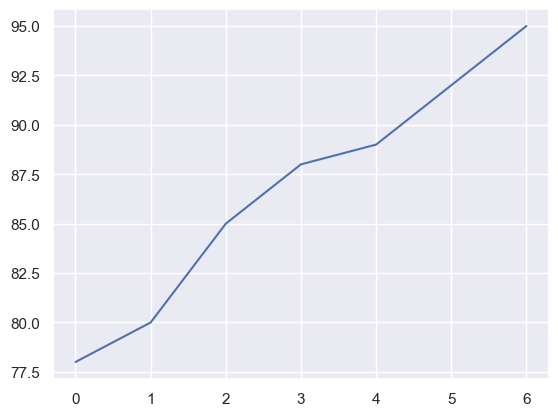

In [60]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set()
plt.plot(np.array(sorted(df['Marks'].dropna())))
plt.show()
#ข้อมูลน่าจะเป็น linear

In [56]:
df.style.highlight_null('red')

,School ID,Name,Address,City,Subject,Marks,Rank,Grade
0,101.000000,Alice,123 Main St,Los Angeles,Math,85.000000,2,B
1,102.000000,Bob,456 Oak Ave,New York,English,92.000000,1,A
2,103.000000,Charlie,789 Pine Ln,Houston,Science,78.000000,4,C
3,nan,David,101 Elm St,Los Angeles,Math,89.000000,3,B
4,105.000000,Eva,nan,Miami,History,nan,8,D
5,106.000000,Frank,222 Maple Rd,nan,Math,95.000000,1,A
6,107.000000,Grace,444 Cedar Blvd,Houston,Science,80.000000,5,C
7,108.000000,Henry,555 Birch Dr,New York,English,88.000000,3,B


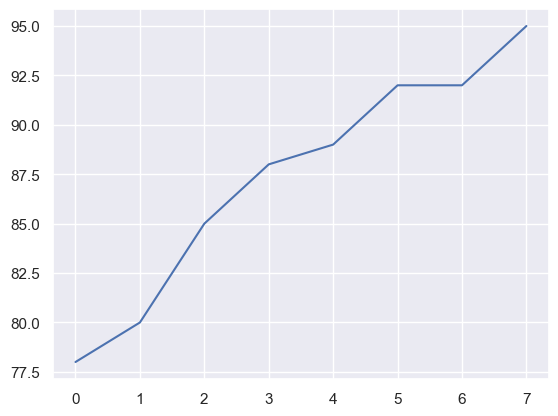

In [58]:
linear = df['Marks'].interpolate(method='linear')
plt.plot(sorted(linear))

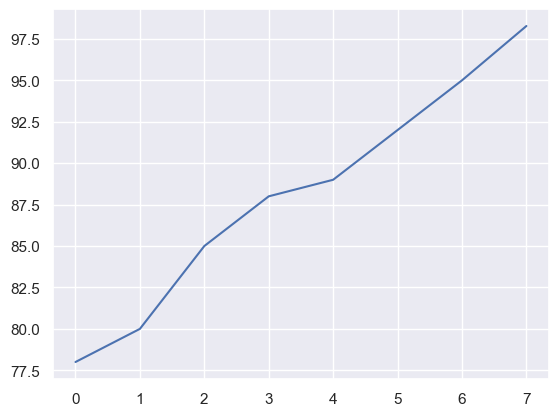

In [62]:
quadatic = df['Marks'].interpolate(method='quadratic')
plt.plot(sorted(quadatic))

### 3) An Extension To Imputation

Imputation is the standard approach, and it usually works well. However, imputed values may be systematically above or below their actual values (which weren't collected in the dataset). Or rows with missing values may be unique in some other way. In that case, your model would make better predictions by considering which values were originally missing.  

![tut3_approach3](https://storage.googleapis.com/kaggle-media/learn/images/UWOyg4a.png)

In this approach, we impute the missing values, as before.  And, additionally, for each column with missing entries in the original dataset, we add a new column that shows the location of the imputed entries.

In some cases, this will meaningfully improve results. In other cases, it doesn't help at all.

# Example 

In the example, we will work with the [Melbourne Housing dataset](https://www.kaggle.com/dansbecker/melbourne-housing-snapshot/home).  Our model will use information such as the number of rooms and land size to predict home price.

We won't focus on the data loading step. Instead, you can imagine you are at a point where you already have the training and validation data in `X_train`, `X_valid`, `y_train`, and `y_valid`. 